# Model Statistics

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
STYLE_TRAIN, COLOR_TRAIN = "s-", "#19c"
STYLE_EVAL, COLOR_EVAL = "^-", "#f91"

## Data Loading

In [8]:
df_records = pd.read_csv(
    "../logs/20240930-183504.csv",
    index_col=0,
)

df_records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   train_time_seconds  8 non-null      float64
 1   eval_time_seconds   8 non-null      float64
 2   epoch_time_seconds  8 non-null      float64
 3   train_avg_loss      8 non-null      float64
 4   eval_avg_loss       8 non-null      float64
 5   eval_accuracy       8 non-null      float64
dtypes: float64(6)
memory usage: 448.0 bytes


## Training Time

In [17]:
train_times_in_seconds = df_records["train_time_seconds"]
total_train_times_in_seconds = train_times_in_seconds.sum()
mean_train_times_in_seconds = train_times_in_seconds.mean()
std_train_times_in_seconds = train_times_in_seconds.std()
print("Total Epoch(s)  : %23d" % len(df_records))
print(
    "Sum(TrainTime)  = %4.0f hr %3.0f min %3.0f sec"
    % (
        total_train_times_in_seconds // 3600,
        total_train_times_in_seconds // 60,
        total_train_times_in_seconds % 60,
    )
)
print(
    "Mean(TrainTime) = %4.0f hr %3.0f min %3.0f sec"
    % (
        mean_train_times_in_seconds // 3600,
        mean_train_times_in_seconds // 60,
        mean_train_times_in_seconds % 60,
    )
)
print(
    "Std(TrainTime)  = %4.0f hr %3.0f min %3.0f sec"
    % (
        mean_train_times_in_seconds // 3600,
        mean_train_times_in_seconds // 60,
        mean_train_times_in_seconds % 60,
    )
)

Total Epoch(s)  :                       8
Sum(TrainTime)  =    0 hr   2 min  18 sec
Mean(TrainTime) =    0 hr   0 min  17 sec
Std(TrainTime)  =    0 hr   0 min  17 sec


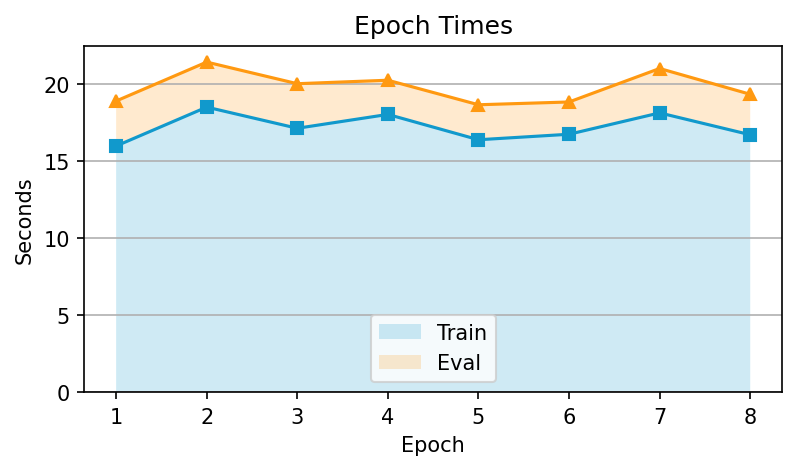

In [10]:

fig = plt.figure(figsize=(6, 3), dpi=150)
fig.set_facecolor("#fff")
ax = fig.add_subplot()
x_plot = df_records.index.to_numpy() + 1
ax.stackplot(
    x_plot,
    train_times_in_seconds,
    df_records["eval_time_seconds"],
    labels=("Train", "Eval"),
    colors=(COLOR_TRAIN, COLOR_EVAL),
    alpha=0.2,
)
ax.plot(
    x_plot,
    train_times_in_seconds,
    STYLE_TRAIN,
    color=COLOR_TRAIN,
)
ax.plot(
    x_plot,
    train_times_in_seconds + df_records["eval_time_seconds"],
    STYLE_EVAL,
    color=COLOR_EVAL,
)
ax.set(
    title="Epoch Times",
    xlabel="Epoch",
    ylabel="Seconds",
)
ax.legend()
ax.grid(axis="y")

## Accuracy & Loss

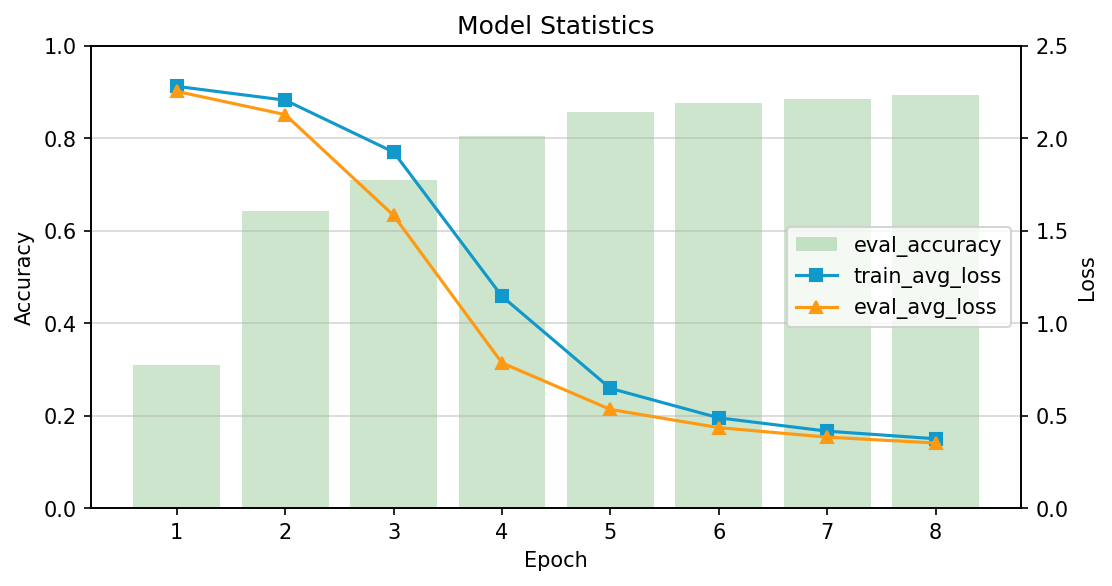

In [11]:
fig = plt.figure(figsize=(8, 4), dpi=150)
fig.set_facecolor("#fff")
ax_acc = fig.add_subplot()
ax_loss = ax_acc.twinx()

x = df_records.index.to_numpy() + 1

ax_loss.legend(
    handles=[
        ax_acc.bar(
            x,
            df_records["eval_accuracy"],
            color="green",
            alpha=0.2,
            label="eval_accuracy",
        ),
        *ax_loss.plot(
            x,
            df_records["train_avg_loss"],
            STYLE_TRAIN,
            color=COLOR_TRAIN,
            label="train_avg_loss",
        ),
        *ax_loss.plot(
            x,
            df_records["eval_avg_loss"],
            STYLE_EVAL,
            color=COLOR_EVAL,
            label="eval_avg_loss",
        ),
    ],
    loc="center right",
)

ax_acc.set(
    ylabel="Accuracy",
    title="Model Statistics",
    xlabel="Epoch",
    ylim=(0, 1),
)
ax_loss.set(
    ylabel="Loss",
    ylim=(0, 2.5),
)
ax_acc.grid(axis="y", alpha=0.5)